<a href="https://colab.research.google.com/github/Viroslav/Farukh_bot/blob/main/(1_2)_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

pd.set_option("display.max.columns", 100)
# to draw pictures in jupyter notebook
%matplotlib inline
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/train.csv", index_col="PassengerId")
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's select those passengers who embarked in Cherbourg (Embarked=C) and paid > 200 pounds for their ticker (fare > 200).

In [ ]:
data[data['Fare'] > 200].query('Embarked == "C"').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


In [ ]:
data[(data["Embarked"] == "C") & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


We can sort these people by Fare in descending order.

In [ ]:
data[data['Fare'] > 200].query('Embarked == "C"').sort_values(by='Fare', ascending = False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


Let's create a new feature.

In [ ]:
def age_category(age):
    """
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    """
    if age < 30:
        return 1
    elif age < 55:
        return 2
    elif age >= 55:
        return 3

In [ ]:
age_categories = [age_category(age) for age in data.Age]
data["Age_category"] = age_categories

In [ ]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.0


In [ ]:
data["Age_category"] = data["Age"].apply(age_category)  # Another way is to do it with apply.

In [ ]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.0


# How many men/women were there onboard

In [ ]:
print(data[data['Sex'] == 'male'].shape[0], data[data['Sex'] == 'female'].shape[0])

577 314


# distribution of the Pclass feature.

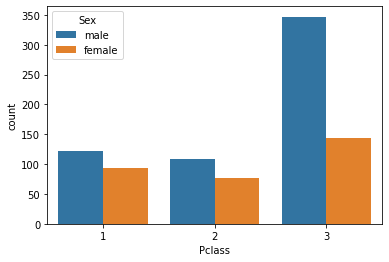

In [ ]:
sns.countplot(data.Pclass, hue=data.Sex);

In [ ]:
data[data['Sex'] == 'male'].groupby('Pclass').agg({"Sex":'count'}).rename(columns={'Sex':'male_quantity'})

,male_quantity
Pclass,
1,122
2,108
3,347


# median and standard deviation of Fare

In [ ]:
print(round(data.Fare.median(), 2), round(data.Fare.std(), 2))

14.45 49.69


# Is that true that the mean age of survived people is higher than that of passengers who eventually died?

In [ ]:
print(data[data['Survived'] == 1].Age.mean(), data[data['Survived'] == 0].Age.mean())

28.343689655172415 30.62617924528302


# Is that true that passengers younger than 30 y.o. survived more frequently than those older than 60 y.o.? What are shares of survived people among young and old people?

In [ ]:
print(data[data['Age'] < 30].Survived.sum(), data[data['Age'] > 60].Survived.sum())

156 5


In [ ]:
data[data['Age'] < 30].Survived.sum()/ data[data['Age'] < 30].Survived.count(), \
 data[data['Age'] > 60].Survived.sum()/ data[data['Age'] > 60].Survived.count()

(0.40625, 0.22727272727272727)

# Is that true that women survived more frequently than men?

In [ ]:
data[data['Sex'] == 'male'].Survived.sum()/ data[data['Sex'] == 'male'].Survived.count(), \
 data[data['Sex'] == 'female'].Survived.sum()/ data[data['Sex'] == 'female'].Survived.count()

(0.18890814558058924, 0.7420382165605095)

# the most popular first name among male passengers?

In [ ]:
data.Name.loc[3]

'Heikkinen, Miss. Laina'

In [ ]:
data.Name.loc[1].count('Miss')

0

In [ ]:
list = []
for i in range(1, len(data)):
  if data.Name.loc[i].count('Miss') < 1 and data.Name.loc[i].count('Mrs') < 1:
    list.append(data.Name.loc[i].split(',')[1].split(' ')[2])

In [ ]:
list[:5]

['Owen', 'William', 'James', 'Timothy', 'Gosta']

In [ ]:
from collections import Counter
a = dict(sorted(Counter(list).items(), key=lambda item: item[1]))

In [ ]:
new_value = max(a, key=a.get)
new_value

'William'

# How is average age for men/women dependent on Pclass?

In [ ]:
sns.set(
    font_scale = 2,
    style      = "whitegrid",  # белый фон и линии за заднем плане
    rc         = {'figure.figsize' :(20, 7)})  # set - установка графиков по умолчанию

In [ ]:
data[data['Sex'] == 'male'].groupby('Pclass').agg({'Age':'mean'})

,Age
Pclass,
1,41.281386
2,30.740707
3,26.507589


In [ ]:
data[data['Sex'] == 'female'].groupby('Pclass').agg({'Age':'mean'})

,Age
Pclass,
1,34.611765
2,28.722973
3,21.750000


In [ ]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.0


Let's dropCabin, and then – all rows with missing values.

In [ ]:
data = data.drop("Cabin", axis=1).dropna()

all scatter plots for each pair of features Age, Fare, SibSp, Parch and Survived

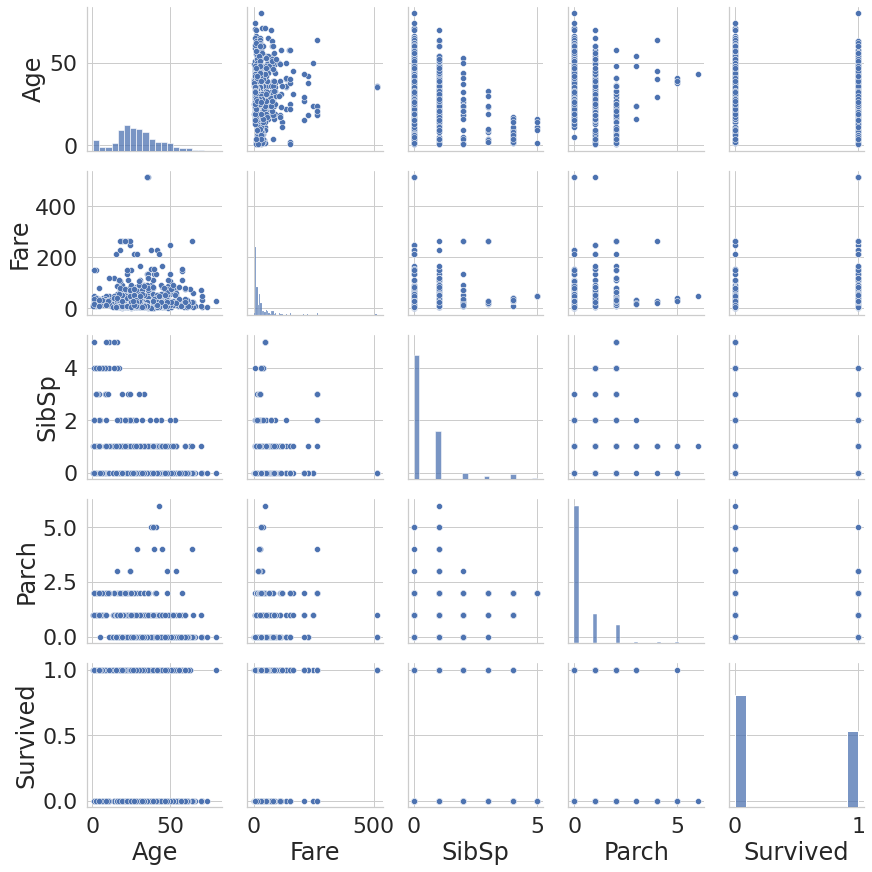

In [ ]:
sns.pairplot(data[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']]);

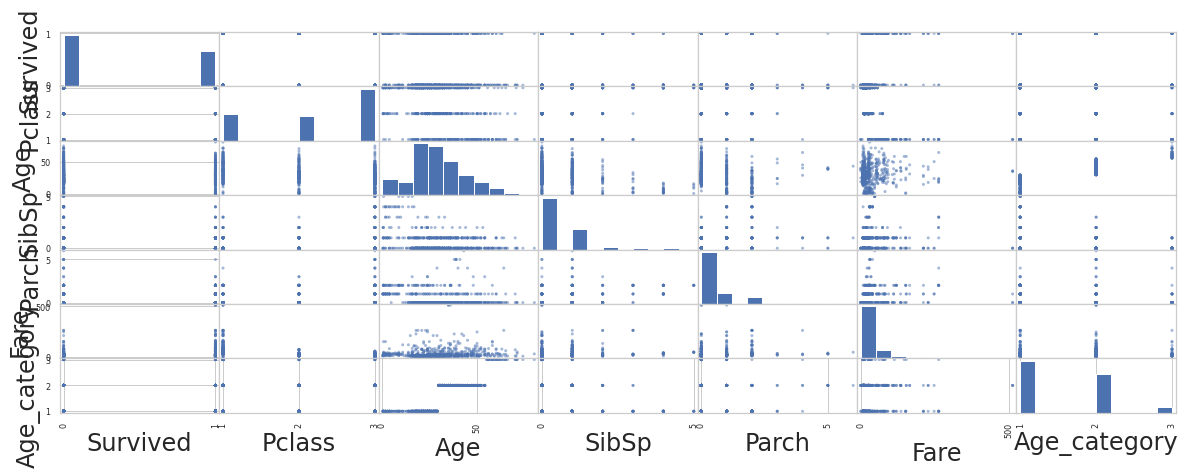

In [ ]:
pd.plotting.scatter_matrix(data);

# How does ticket price (Fare) depend on Pclass?

(0.0, 300.0)

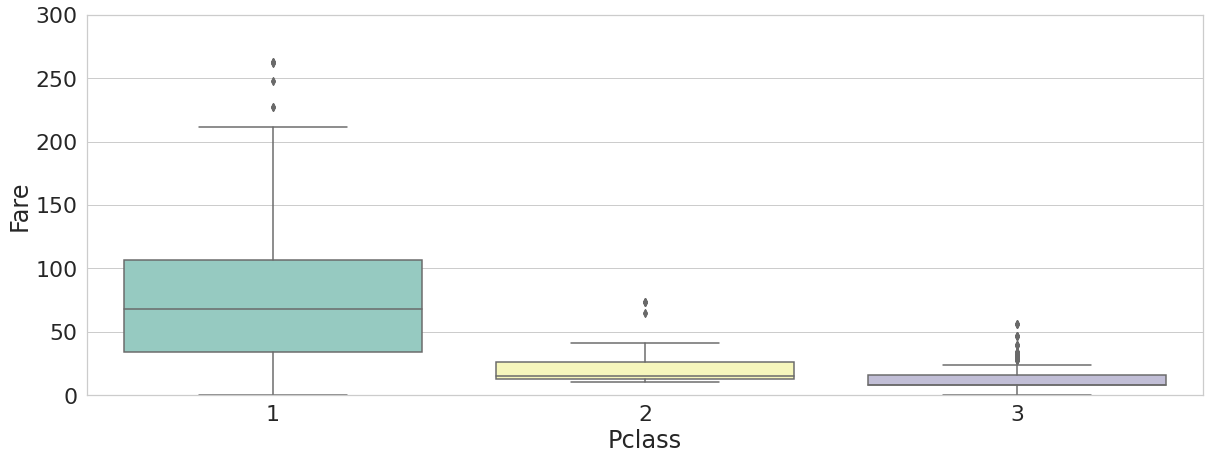

In [ ]:
sns.boxplot(y = 'Fare', x = 'Pclass', data = data, palette="Set3")
plt.ylim(0, 300)

# drop outliers that make the plot less clear

In [ ]:
data.Fare.quantile(0.95)

120.0

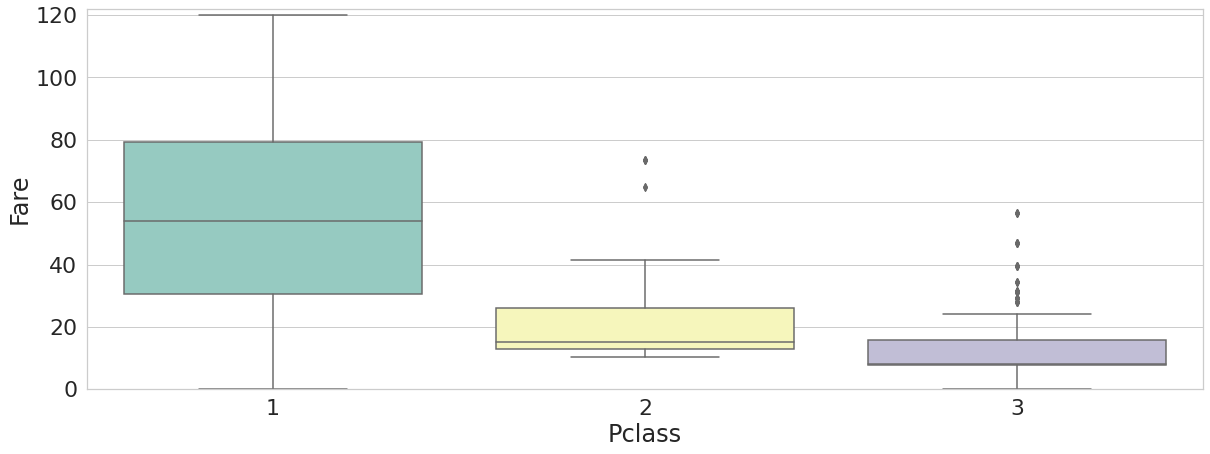

In [ ]:
sns.boxplot(y = 'Fare', x = 'Pclass', data = data[data['Fare'] <= data.Fare.quantile(0.95)], palette="Set3")
plt.ylim(0, 122);

# How is the percentage of surviving passengers dependent on passengers' gender?

In [ ]:
print(data[data['Sex'] == 'male']['Survived'].sum() / data[data['Sex'] == 'male'].shape[0],
data[data['Sex'] == 'female']['Survived'].sum() / data[data['Sex'] == 'female'].shape[0])

0.2052980132450331 0.752895752895753


In [ ]:
pd.crosstab(data["Sex"], data["Survived"])

Survived,0,1
Sex,,
female,64,195
male,360,93


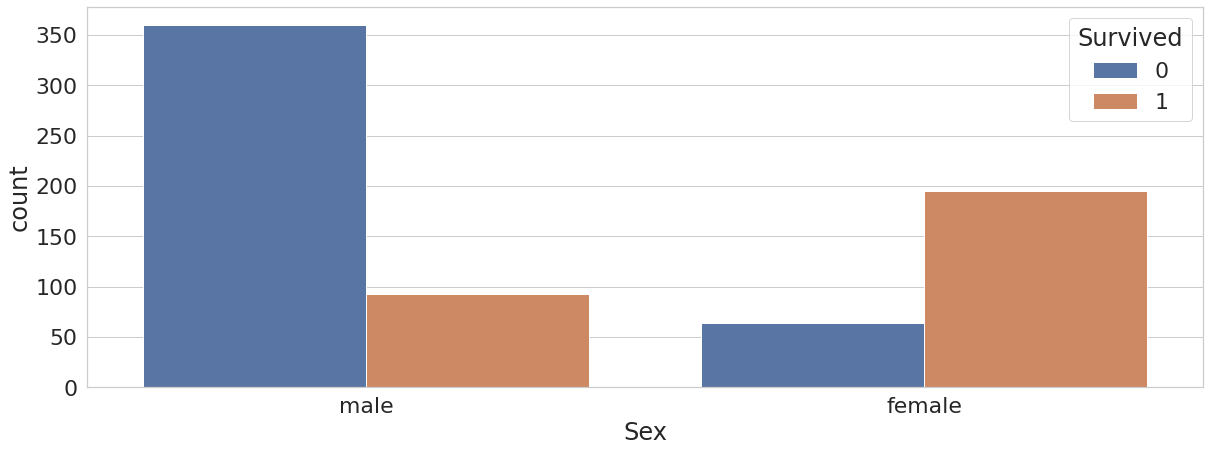

In [ ]:
sns.countplot(x="Sex", hue='Survived', data = data)

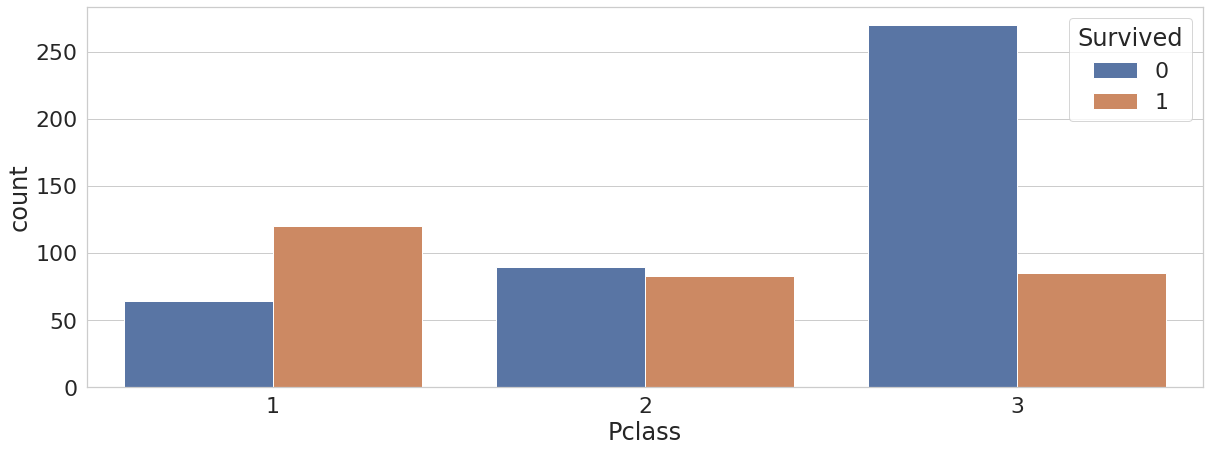

In [ ]:
sns.countplot(x="Pclass", hue="Survived", data=data);

# How does the distribution of ticket prices differ for those who survived and those who didn't

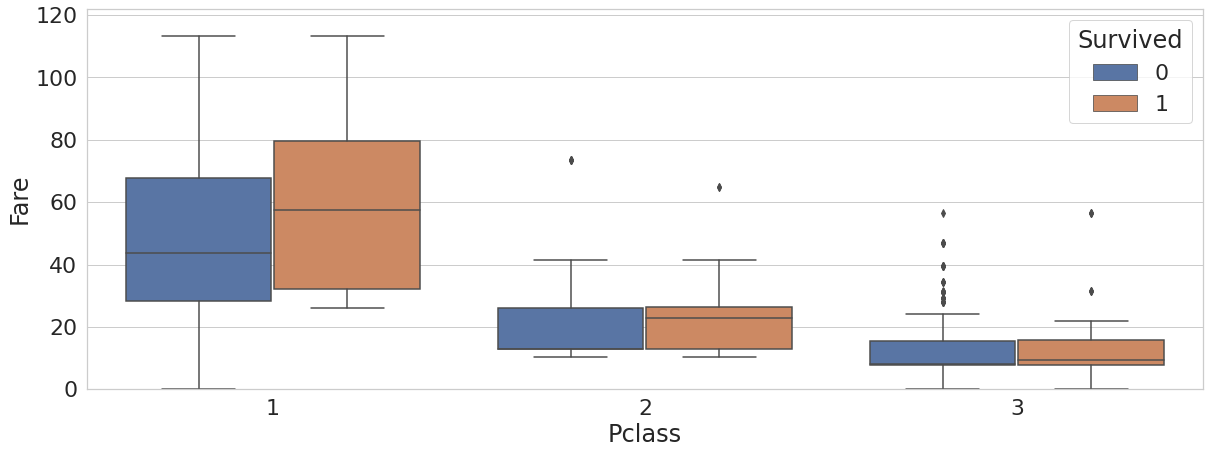

In [ ]:
sns.boxplot(x='Pclass', y = 'Fare', 
            hue='Survived', data = data[data['Fare'] < data.Fare.quantile(0.95)]);
plt.ylim(0, 122);

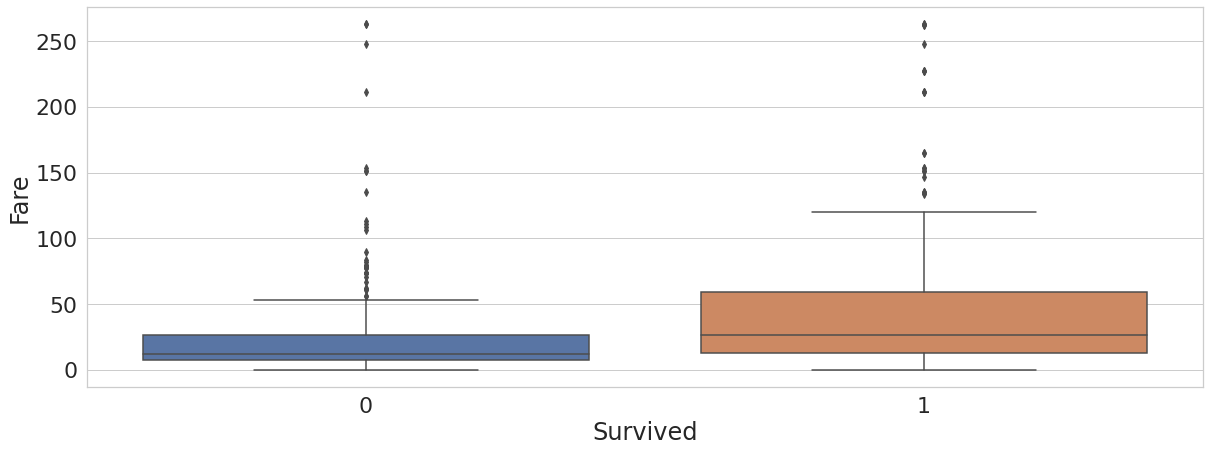

In [ ]:
sns.boxplot(x="Survived", y="Fare", data=data[data["Fare"] < 500]);

# How does survival depend on passengers' age? 

In [ ]:
data[data['Age'] < 30].Survived.sum()/ data[data['Age'] < 30].Survived.count(), \
 data[data['Age'] > 55].Survived.sum()/ data[data['Age'] > 55].Survived.count()

(0.40625, 0.28205128205128205)

In [ ]:
data.Age_category  # 1 - < 30, 3 - > 55

PassengerId
1      1.0
2      2.0
3      1.0
4      2.0
5      2.0
      ... 
886    2.0
887    1.0
888    1.0
890    1.0
891    2.0
Name: Age_category, Length: 712, dtype: float64

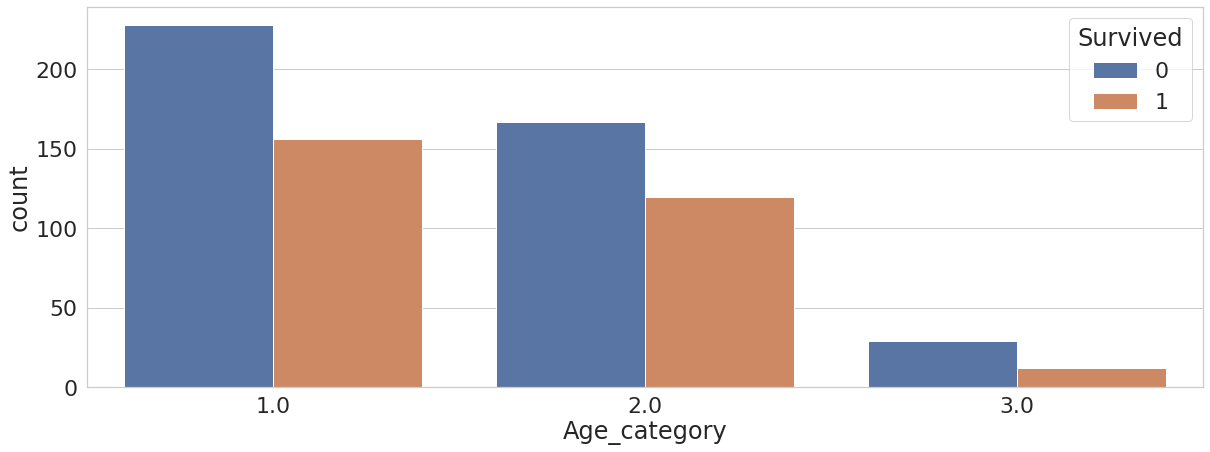

In [ ]:
sns.countplot(x="Age_category", hue="Survived", data=data);

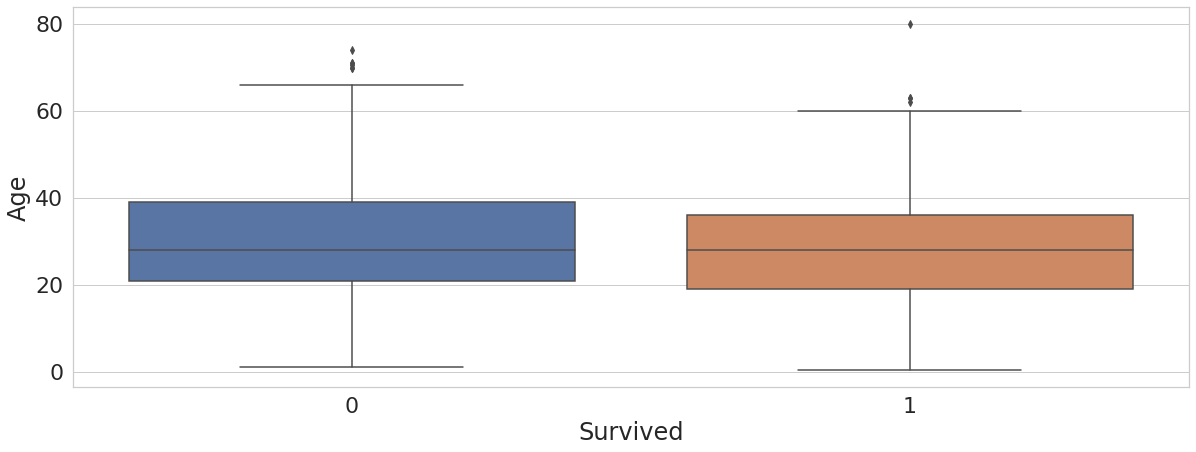

In [ ]:
sns.boxplot(x="Survived", y="Age", data=data);

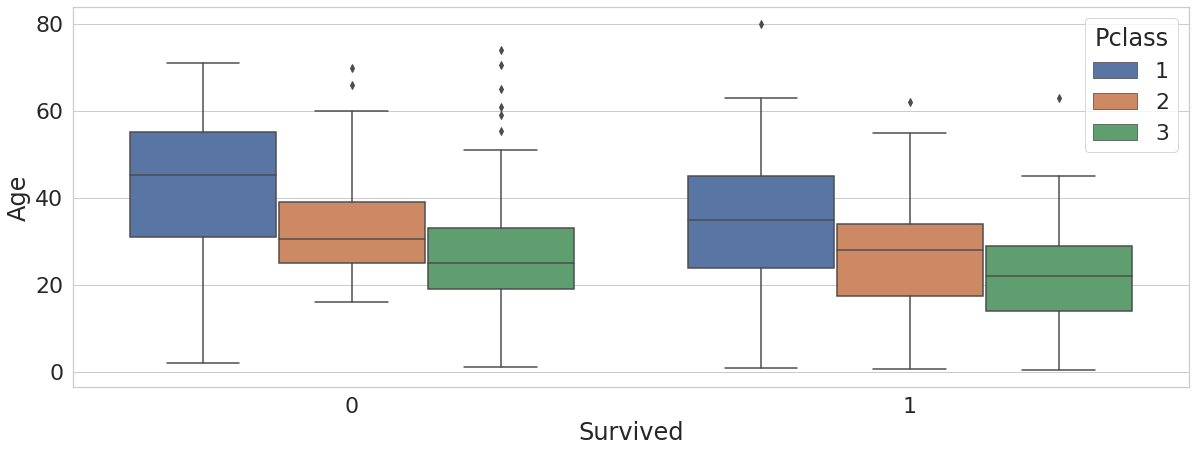

In [ ]:
sns.boxplot(x="Survived", hue="Pclass", y="Age", data=data);

# Decision Tree

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df_train = pd.read_csv('/content/train.csv', index_col='PassengerId')
df_test = pd.read_csv('/content/test.csv', index_col='PassengerId')

In [ ]:
y = df_train["Survived"]

In [ ]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Функция для формирования csv-файла посылки на Kaggle:



In [ ]:
def write_to_submission_file(
    predicted_labels,
    out_file,
    train_num=891,
    target="Survived",
    index_label="PassengerId",
):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(
        predicted_labels,
        index=np.arange(train_num + 1, train_num + 1 + predicted_labels.shape[0]),
        columns=[target],
    )
    predicted_df.to_csv(out_file, index_label=index_label)

In [ ]:
df_train.describe(include = 'all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
df_train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
df_test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [ ]:
df_train.Age = df_train.Age.fillna(df_train.Age.median())
df_test.Age = df_test.Age.fillna(df_test.Age.median())

In [ ]:
df_train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
df_train["Embarked"].fillna("S", inplace=True)
df_test["Fare"].fillna(df_train["Fare"].median(), inplace=True)

In [ ]:
df_train = pd.concat(
    [
        df_train,
        pd.get_dummies(df_train["Pclass"], prefix="PClass"),
        pd.get_dummies(df_train["Sex"], prefix="Sex"),
        pd.get_dummies(df_train["SibSp"], prefix="SibSp"),
        pd.get_dummies(df_train["Parch"], prefix="Parch"),
        pd.get_dummies(df_train["Embarked"], prefix="Embarked"),
    ],
    axis=1,
)
df_test = pd.concat(
    [
        df_test,
        pd.get_dummies(df_test["Pclass"], prefix="PClass"),
        pd.get_dummies(df_test["Sex"], prefix="Sex"),
        pd.get_dummies(df_test["SibSp"], prefix="SibSp"),
        pd.get_dummies(df_test["Parch"], prefix="Parch"),
        pd.get_dummies(df_test["Embarked"], prefix="Embarked"),
    ],
    axis=1,
)

In [ ]:
df_train.drop(
    [
        "Survived",
        "Pclass",
        "Name",
        "Sex",
        "SibSp",
        "Parch",
        "Ticket",
        "Cabin",
        "Embarked",
    ],
    axis=1,
    inplace=True,
)
df_test.drop(
    [
        "Pclass",
        "Name",
        "Sex",
        "SibSp",
        "Parch",
        "Ticket",
        "Cabin",
        "Embarked"
    ],
    axis=1,
    inplace=True,
)

In [ ]:

df_train.shape, df_test.shape

((891, 24), (418, 25))

In [ ]:
set(df_test.columns) - set(df_train.columns)

{'Parch_9'}

In [ ]:
df_test.drop(["Parch_9"], axis=1, inplace=True)

##1. Дерево решений без настройки параметров

In [ ]:
tree = DecisionTreeClassifier(random_state = 17, max_depth = 2)

In [ ]:
tree.fit(df_train, y)

DecisionTreeClassifier(max_depth=2, random_state=17)

In [ ]:
tree.predict(df_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
def write_to_submission_file(
    predicted_labels,
    out_file,
    train_num=891,
    target="Survived",
    index_label="PassengerId",
):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(
        tree.predict(df_test),
        index=np.arange(train_num + 1, train_num + 1 + predicted_labels.shape[0]),
        columns=[target], 
    )
    predicted_df.to_csv(out_file, index_label=index_label)
    print(predicted_df)

In [ ]:
write_to_submission_file(tree.predict(df_test), '/content/submission.csv')

      Survived
892          0
893          0
894          0
895          0
896          0
...        ...
1305         0
1306         1
1307         0
1308         0
1309         0

[418 rows x 1 columns]


export_graphviz и dot.

In [ ]:
clf = tree.fit(df_train, y)

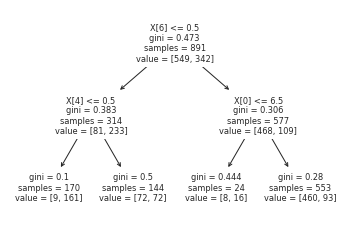

In [ ]:
from sklearn import tree
tree.plot_tree(clf);

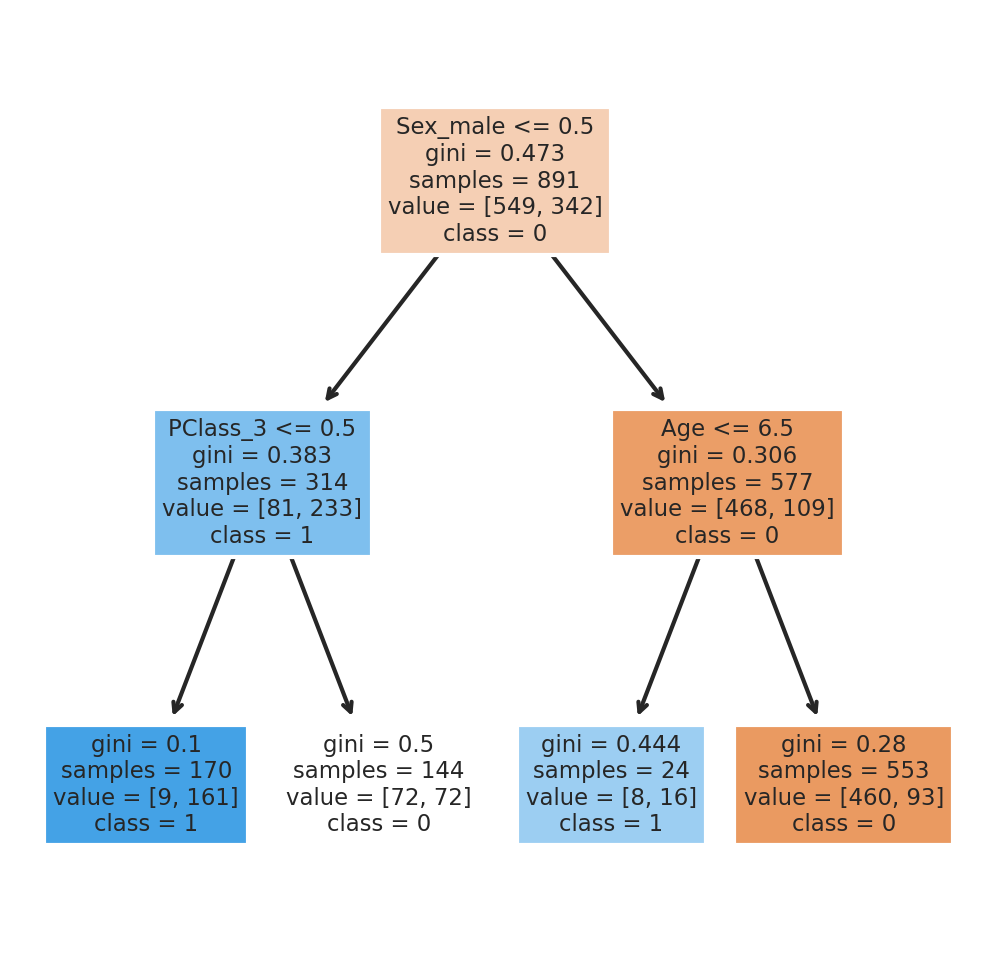

In [ ]:
fn=df_train.columns
cn=str(y.value_counts().index[0]), str(y.value_counts().index[1])
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'max_depth':[2,3], 'min_samples_leaf':[1,2,3,4]}

In [ ]:
tree_grid = GridSearchCV(tree, params, cv=5, n_jobs = -1)

In [ ]:
%%time
tree_grid.fit(df_train, y)

CPU times: user 120 ms, sys: 19.5 ms, total: 140 ms
Wall time: 1.19 s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3], 'min_samples_leaf': [1, 2, 3, 4]})

In [ ]:
tree_grid.best_score_, tree_grid.best_params_

(0.8103132257862031, {'max_depth': 3, 'min_samples_leaf': 3})

In [ ]:
tree_best = DecisionTreeClassifier(max_depth= 3, min_samples_leaf= 3)

In [ ]:
tree_best.fit(df_train, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)

In [ ]:
a = tree_best.predict(df_test)
a

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
submission = pd.DataFrame(columns=["PassengerId","Survived"])
submission["PassengerId"] = np.arange(892, 1310)
submission.set_index('PassengerId')
submission["Survived"] = a
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv('submission.csv', index=False)

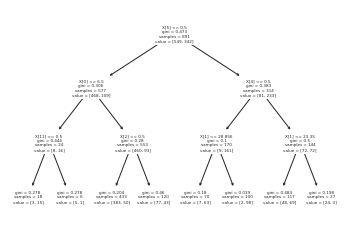

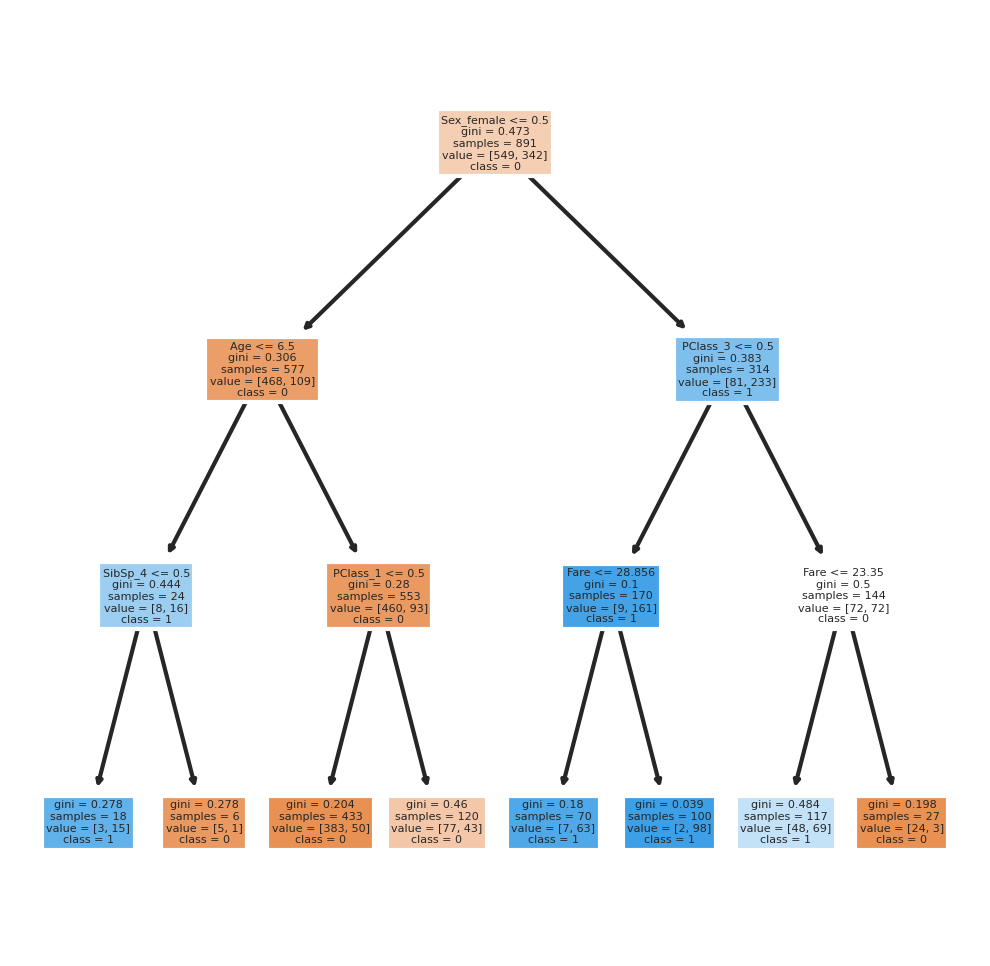

In [ ]:
from sklearn import tree
clf = tree_best.fit(df_train, y)
tree.plot_tree(clf);
fn=df_train.columns
cn=str(y.value_counts().index[0]), str(y.value_counts().index[1])
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(tree_best,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')